In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [483]:
dataset=pd.read_csv("reviews_dataset.csv",encoding='latin1')

In [484]:
dataset.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20
0,airasia,A320,"| According their check in process, they men...",Oct-22,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",Nov-22,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",Nov-22,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN
3,airasia,NaN,"? , | My wife has problems with her knees and...",Oct-22,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",Oct-22,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN


In [485]:
dataset.count()

AirName                19534
AircraftModel           6371
Comments               19534
DateFlown              15961
EntertainmentRating    19534
FoodRating             19532
GroundServiceRating    19534
OverallScore           19136
Recommended             7587
ReviewDate             19534
ReviewTitle            19534
ReviewrCountry         19534
Route                  15898
SeatComfortRating      19534
SeatType               19404
ServiceRating          19534
TravelType             15979
ValueRating            19534
WifiRating             19532
Unnamed: 19                2
Unnamed: 20                2
dtype: int64

In [486]:
dataset.describe

<bound method NDFrame.describe of                AirName AircraftModel  \
0              airasia          A320   
1              airasia           NaN   
2              airasia          A320   
3              airasia           NaN   
4              airasia           NaN   
...                ...           ...   
19529  united-airlines    Boeing 747   
19530  united-airlines           NaN   
19531  united-airlines           NaN   
19532  united-airlines           NaN   
19533  united-airlines           NaN   

                                                Comments DateFlown  \
0       |  According their check in process, they men...    Oct-22   
1      ? , | Nice, uneventful short flight, clean air...    Nov-22   
2      ? , | Never again with AirAsia. I wish I could...    Nov-22   
3      ? , |  My wife has problems with her knees and...    Oct-22   
4      ? , |  My flight was suppose to be at 4.35 pm ...    Oct-22   
...                                                  ...       ..

In [487]:
dataset.isna().sum()

AirName                    0
AircraftModel          13163
Comments                   0
DateFlown               3573
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             398
Recommended            11947
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3636
SeatComfortRating          0
SeatType                 130
ServiceRating              0
TravelType              3555
ValueRating                0
WifiRating                 2
Unnamed: 19            19532
Unnamed: 20            19532
dtype: int64

In [488]:
dataset.duplicated().sum()

586

In [489]:
dataset.drop_duplicates(inplace=True)

In [490]:
dataset.duplicated().sum()

0

In [491]:
dataset.drop(['Unnamed: 19','Unnamed: 20'], axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'FoodRating'}>,
        <AxesSubplot:title={'center':'GroundServiceRating'}>],
       [<AxesSubplot:title={'center':'OverallScore'}>,
        <AxesSubplot:title={'center':'ServiceRating'}>],
       [<AxesSubplot:title={'center':'ValueRating'}>,
        <AxesSubplot:title={'center':'WifiRating'}>]], dtype=object)

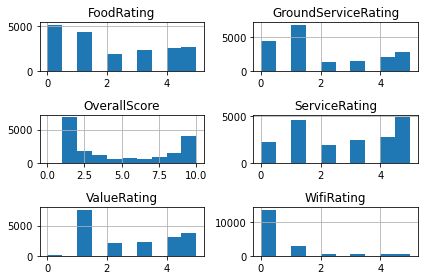

In [492]:
dataset.hist()

In [493]:
dataset.isna().sum()

AirName                    0
AircraftModel          12776
Comments                   0
DateFlown               3547
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             393
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 2
dtype: int64

In [494]:
dataset.drop(['AircraftModel'], axis=1,inplace=True)

In [495]:
dataset.isna().sum()

AirName                    0
Comments                   0
DateFlown               3547
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             393
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 2
dtype: int64

In [496]:
dataset['Recommended'] = dataset['Recommended'].interpolate()
dataset['OverallScore'] = dataset['OverallScore'].interpolate()
dataset['Route'] = dataset['Route'].interpolate()
dataset['SeatType'] = dataset['SeatType'].interpolate()
dataset['TravelType'] = dataset['TravelType'].interpolate()
dataset['WifiRating'] = dataset['WifiRating'].interpolate()
dataset['FoodRating'] = dataset['FoodRating'].interpolate()
dataset['Recommended'] = dataset['Recommended'].interpolate()

In [497]:
dataset.isna().sum()

AirName                    0
Comments                   0
DateFlown               3547
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 0
dtype: int64

In [498]:
dataset.describe

<bound method NDFrame.describe of                AirName                                           Comments  \
0              airasia   |  According their check in process, they men...   
1              airasia  ? , | Nice, uneventful short flight, clean air...   
2              airasia  ? , | Never again with AirAsia. I wish I could...   
3              airasia  ? , |  My wife has problems with her knees and...   
4              airasia  ? , |  My flight was suppose to be at 4.35 pm ...   
...                ...                                                ...   
19529  united-airlines   |  My whole experience this evening, from an ...   
19530  united-airlines  ? , |  United is the most unorganized airline ...   
19531  united-airlines   |  We flew from FL to Houston on February 25t...   
19532  united-airlines  ? , |  Stuck in Denver for almost 24 hours bec...   
19533  united-airlines  ? , |  We had a connecting flight through Newa...   

      DateFlown EntertainmentRating  Food

In [499]:
dataset["Recommended"].value_counts()

yes    7412
0         2
Name: Recommended, dtype: int64

In [500]:
dataset["OverallScore"].value_counts()

1.000000     6840
10.000000    2319
2.000000     1818
9.000000     1774
8.000000     1569
             ... 
5.666667        1
1.333333        1
1.666667        1
5.200000        1
4.666667        1
Name: OverallScore, Length: 97, dtype: int64

In [501]:
dataset["OverallScore"]=dataset["OverallScore"].astype(int)

In [502]:
dataset["OverallScore"].value_counts()

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
0        2
Name: OverallScore, dtype: int64

In [503]:
dataset["Comments"].value_counts()

Flight from Seattle to Honolulu in an old Boeing 767 which was 26 years old. Crew was nice but service was normal. Seats were broken and legroom was ok lavatories showed their age and had a bad smell. Free food service that is not normal on us-carriers. Food was enough and the quality was fair. Took some time in Honolulu until we reached the gate almost 20 minutes after landing.                                                                                                                                                                                                                                                                                                                                                                               2
DEL-COK-DEL. Excellent flight both flights on time as we had pre-booked meals and seats check-in was a breeze. Overall highly recommended as a premium low cost carrier.                                                                                  

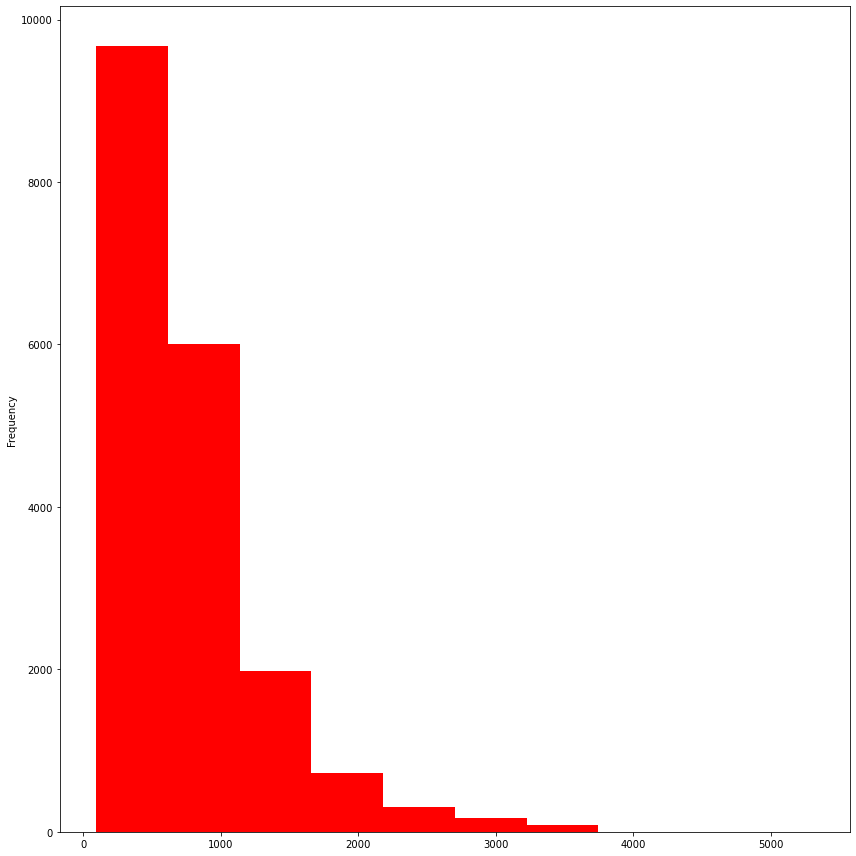

In [504]:
length_test = dataset['Comments'].str.len().plot.hist(color = 'red', figsize = (12, 12))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

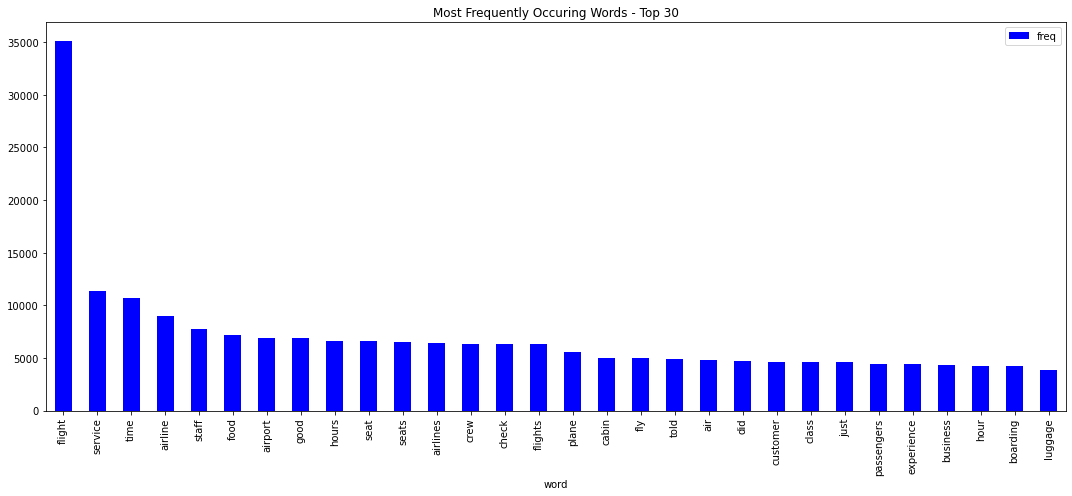

In [505]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset.Comments)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [506]:
# !pip install wordcloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

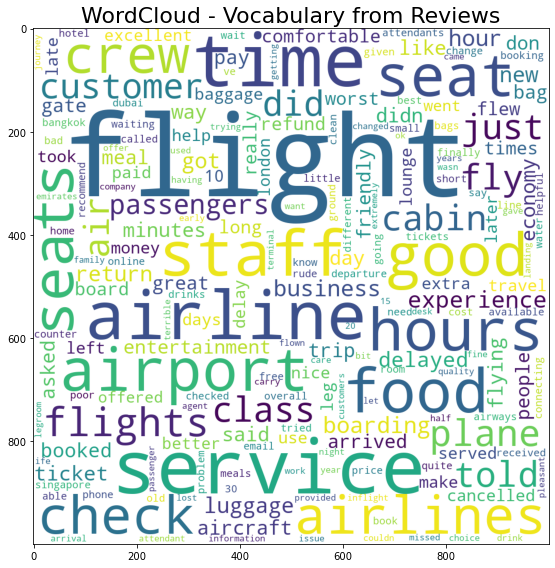

In [507]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

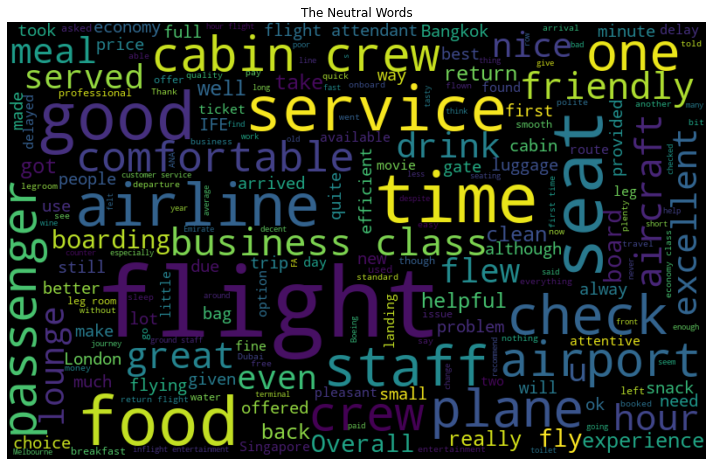

In [508]:
normal_words =' '.join([text for text in dataset['Comments'][dataset['OverallScore'] >= 5]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

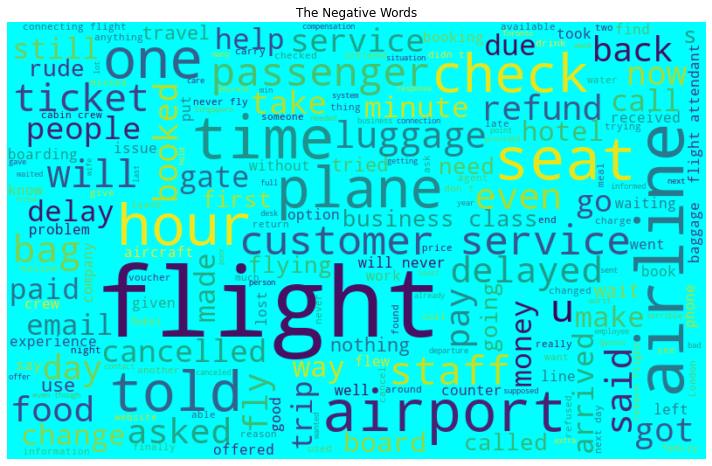

In [509]:
negative_words =' '.join([text for text in dataset['Comments'] [dataset['OverallScore'] < 5]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [510]:
import nltk
# nltk.download('stopwords')
# nltk.download()
# nltk.download('punkt')
# nltk.download('wordnet')

In [511]:
dataset.insert(3,"Review", " ")

In [512]:
# removing unwanted patterns from the data

import re
import nltk

#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

df_corpus = []

for ind in dataset.index:
  review = re.sub('[^a-zA-Z]', ' ', dataset['Comments'][ind])
  review = review.lower()
  dataset['Comments'][ind]=review
  review = review.split()

  
  lemmatizer = WordNetLemmatizer()

  
  # stemming
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  df_corpus.append(review)
  dataset['Review'][ind]=review

In [513]:
df_corpus[:5]

['according check process mentioned able start online check day departure however reality day make correction flight return krabi kuala lumpur inflight meal sold cabin crew mentioned left nasi lemak option make announcement flight already sky selangor know purpose make announcement food sold flight prepare landing bring food since notice restaurant operate international terminal neo seat suck comfortable',
 'nice uneventful short flight clean aircraft super nice crew left time arrived time negative parked bit far away arrival dmk',
 'never airasia wish could given star coming loyal customer pre pandemic day airline unfortunately never recovered pandemic sector inbound outbound flight delayed hour finally landed domestic terminal ushered bus go international walking way immigration wait luggage absolutely horrible ruined day week',
 'wife problem knee great difficulty stair notified person counter asked stair said said ok charged u wheelchair wheelchair brought said push declined sent s

In [514]:
dataset.Comments[1]

'      nice  uneventful short flight  clean aircraft  super nice crew  left on time  arrived on time  only  negative   parked a bit far away from arrival at dmk '

In [566]:
# removing unwanted patterns from the data

import re
import nltk

#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

df_corpus = []

for ind in dataset.index:
  review = re.sub('[^a-zA-Z]', ' ', dataset['ReviewTitle'][ind])
  review = review.lower()
  dataset['ReviewTitle'][ind]=review
  review = review.split()

  
  lemmatizer = WordNetLemmatizer()

  
  # stemming
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  df_corpus.append(review)
  dataset['ReviewTitle'][ind]=review

In [515]:
dataset.isnull().sum()

AirName                    0
Comments                   0
DateFlown               3547
Review                     0
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 0
dtype: int64

In [516]:
dataset.drop(['Route','TravelType'], axis=1,inplace=True)

In [517]:
dataset.isnull().sum()


AirName                    0
Comments                   0
DateFlown               3547
Review                     0
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
SeatComfortRating          0
SeatType                 127
ServiceRating              0
ValueRating                0
WifiRating                 0
dtype: int64

In [518]:
dataset.columns

Index(['AirName', 'Comments', 'DateFlown', 'Review', 'EntertainmentRating',
       'FoodRating', 'GroundServiceRating', 'OverallScore', 'Recommended',
       'ReviewDate', 'ReviewTitle', 'ReviewrCountry', 'SeatComfortRating',
       'SeatType', 'ServiceRating', 'ValueRating', 'WifiRating'],
      dtype='object')

In [519]:
dataset["Recommended"].value_counts()

yes    7412
0         2
Name: Recommended, dtype: int64

In [520]:
dataset['OverallScore'].value_counts()

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
0        2
Name: OverallScore, dtype: int64

In [521]:
dataset['EntertainmentRating'].value_counts()    

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              8137
1                                                                                                                                                                   

In [522]:
dataset.drop(dataset.index[dataset["EntertainmentRating"].apply(lambda x: not (x.strip().isnumeric()))], axis=0, inplace=True)

In [523]:
dataset['EntertainmentRating'].value_counts()   #>2

0    8137
1    3913
3    1947
4    1930
5    1661
2    1358
Name: EntertainmentRating, dtype: int64

In [524]:
dataset['GroundServiceRating'].value_counts() #>2

1    6882
0    4450
5    2773
4    2029
3    1506
2    1306
Name: GroundServiceRating, dtype: int64

In [525]:
 dataset['OverallScore'].value_counts() #>5

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
Name: OverallScore, dtype: int64

In [526]:
 dataset['SeatComfortRating'].value_counts() #>2

1    4878
4    3471
3    3297
5    2731
2    2349
0    2220
Name: SeatComfortRating, dtype: int64

In [527]:
dataset['ServiceRating'].value_counts() #>2

5    4899
1    4615
4    2745
3    2445
0    2266
2    1976
Name: ServiceRating, dtype: int64

In [528]:
 dataset['ValueRating'].value_counts() #>2

1    7642
5    3825
4    3022
3    2207
2    2103
0     147
Name: ValueRating, dtype: int64

In [529]:
 dataset['WifiRating'].value_counts() #Impact of WifiRating in recommended column as 0 holds more than 13k is more

0.0    13854
1.0     3038
5.0      609
3.0      524
4.0      465
2.0      456
Name: WifiRating, dtype: int64

In [530]:
dataset["Recommended"].value_counts()

yes    7412
Name: Recommended, dtype: int64

In [531]:
for ind in dataset.index:
    if dataset["Recommended"][ind] == 'yes':
          dataset["Recommended"][ind]=1
    else:
          dataset["Recommended"][ind]=0

In [532]:
dataset["Recommended"].value_counts()


0    11534
1     7412
Name: Recommended, dtype: int64

In [533]:
dataset["Recommended"]=dataset["Recommended"].astype(int)

In [534]:
for ind in dataset.index:
    if dataset["Recommended"][ind] == 0:
        if dataset["EntertainmentRating"][ind] >'2':
            if dataset["GroundServiceRating"][ind] >2:
                if dataset["OverallScore"][ind] >5:
                    if dataset["SeatComfortRating"][ind] >'2':
                        if dataset["ServiceRating"][ind] >2:
                            if dataset["ValueRating"][ind] >2:
                                dataset["Recommended"][ind]=1

In [535]:
dataset["Recommended"].value_counts()

0    11504
1     7442
Name: Recommended, dtype: int64

<AxesSubplot:>

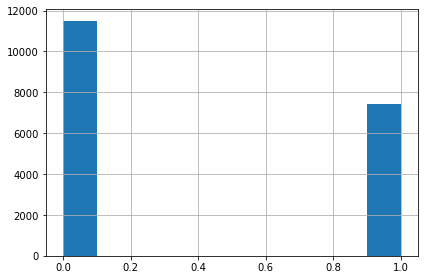

In [536]:
dataset["Recommended"].hist()

In [537]:
dataset.isnull().sum()

AirName                   0
Comments                  0
DateFlown              3545
Review                    0
EntertainmentRating       0
FoodRating                0
GroundServiceRating       0
OverallScore              0
Recommended               0
ReviewDate                0
ReviewTitle               0
ReviewrCountry            0
SeatComfortRating         0
SeatType                125
ServiceRating             0
ValueRating               0
WifiRating                0
dtype: int64

In [538]:
dataset = dataset.dropna(subset=['SeatType'])

In [539]:
dataset.isnull().sum()

AirName                   0
Comments                  0
DateFlown              3421
Review                    0
EntertainmentRating       0
FoodRating                0
GroundServiceRating       0
OverallScore              0
Recommended               0
ReviewDate                0
ReviewTitle               0
ReviewrCountry            0
SeatComfortRating         0
SeatType                  0
ServiceRating             0
ValueRating               0
WifiRating                0
dtype: int64

In [540]:
dataset['ReviewDate'].value_counts()

4th August 2022       34
22nd May 2022         33
19th January 2015     32
14th July 2022        32
23rd July 2022        32
                      ..
21st February 2012     1
4th January 2012       1
22nd December 2011     1
20th December 2011     1
28th April 2010        1
Name: ReviewDate, Length: 3671, dtype: int64

In [541]:
import datetime

def dateconv(strr):
    
    # Parse the date string into a datetime object
    date_str = strr # 9th November 2022
    try:
        date = datetime.datetime.strptime(date_str, "%dth %B %Y")
    except ValueError:
        try:
            date = datetime.datetime.strptime(date_str, "%dst %B %Y")
        except ValueError:
            try:
                date = datetime.datetime.strptime(date_str, "%dnd %B %Y")
            except ValueError:
                try:
                    date = datetime.datetime.strptime(date_str, "%drd %B %Y") 
                except:
                    print(date_str)
                    print("something went wrong!")
    
    finally:
        # Extract the day, month, and year from the datetime object
        month = date.month
        year = date.year

        # Convert the day, month, and year to strings, and pad with zeros as necessary
        month_str = str(month).zfill(2)
        year_str = str(year)[2:]

        # Concatenate the day, month, and year strings to create the final integer
        int_date = month_str + year_str
    #     print(int_date)  # Output: "091122"
    return int_date


In [542]:
print(dateconv("4th August 2022"))

0822


In [543]:
for ind in dataset.index:
    try:
        if int(dataset["ReviewDate"][ind]) < 311223:
            continue
    except ValueError:
        dataset["ReviewDate"][ind]=dateconv(dataset["ReviewDate"][ind])

In [544]:
dataset['ReviewDate'].value_counts()

0722    642
0822    606
1022    586
0622    553
0922    507
       ... 
0909      3
0609      2
1009      2
0709      1
0809      1
Name: ReviewDate, Length: 162, dtype: int64

In [545]:
dataset.head(15)

,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,airasia,according their check in process they men...,Oct-22,according check process mentioned able start o...,1,1.0,1,1,0,1122,"""They should bring more food""",(Malaysia),1,Economy Class,3,2,1.0
1,airasia,nice uneventful short flight clean air...,Nov-22,nice uneventful short flight clean aircraft su...,0,0.0,5,9,1,1122,"""Nice, uneventful short flight""",(Malaysia),4,Economy Class,5,5,0.0
2,airasia,never again with airasia i wish i could...,Nov-22,never airasia wish could given star coming loy...,0,1.0,1,1,0,1122,"""Never again with AirAsia""",(Malaysia),1,Economy Class,1,2,0.0
3,airasia,my wife has problems with her knees and...,Oct-22,wife problem knee great difficulty stair notif...,0,0.0,1,2,1,1122,"""when it was time to board no wheelchair""",(Malaysia),1,Economy Class,1,1,0.0
4,airasia,my flight was suppose to be at pm ...,Oct-22,flight suppose pm flight got delayed pm waited...,0,0.0,1,1,0,1122,"""a very bad experience for me""",(Malaysia),1,Economy Class,1,1,0.0
5,airasia,first of all i understand that airasia ...,Oct-22,first understand airasia low fare airline mean...,1,5.0,2,5,1,1022,"""please respect your customers time""",(Malaysia),1,Economy Class,4,3,1.0
6,airasia,airasia has no proper customer support ...,Oct-22,airasia proper customer support able reach cus...,0,0.0,0,2,0,1022,"""not able to reach customer care""",(Malaysia),0,Economy Class,0,3,0.0
7,airasia,booking for onward flights were correct...,Sep-22,booking onward flight correct enough time conn...,0,1.0,1,2,0,1022,"""too short time to connect""",(Malaysia),2,Economy Class,1,2,0.0
8,airasia,absolutely the worst customer service can...,Oct-22,absolutely worst customer service ever talk re...,0,0.0,1,1,0,1022,"""I'll pay more elsewhere""",(Malaysia),1,Economy Class,1,1,0.0
9,airasia,the system auto assigned my yr old daugh...,Oct-22,system auto assigned yr old daughter seat row ...,0,0.0,1,1,0,1022,"""Go with another airline""",(Malaysia),3,Economy Class,3,3,0.0


In [546]:
dataset['SeatType'].value_counts()

Economy Class      15529
Business Class      2554
Premium Economy      532
First Class          206
Name: SeatType, dtype: int64

In [547]:
dataset.describe

<bound method NDFrame.describe of                AirName                                           Comments  \
0              airasia      according their check in process  they men...   
1              airasia        nice  uneventful short flight  clean air...   
2              airasia        never again with airasia  i wish i could...   
3              airasia         my wife has problems with her knees and...   
4              airasia         my flight was suppose to be at      pm ...   
...                ...                                                ...   
19529  united-airlines      my whole experience this evening  from an ...   
19530  united-airlines         united is the most unorganized airline ...   
19531  united-airlines      we flew from fl to houston on february   t...   
19532  united-airlines         stuck in denver for almost    hours bec...   
19533  united-airlines         we had a connecting flight through newa...   

      DateFlown                          

In [549]:
dataset.to_csv('ProcessedDataset.csv')

## Verifying whether Review date can be used as travel date for missing values

In [269]:
data=pd.read_csv("reviews_dataset.csv",encoding='latin1')

In [270]:
data.isna().sum()

AirName                    0
AircraftModel          13163
Comments                   0
DateFlown               3573
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             398
Recommended            11947
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3636
SeatComfortRating          0
SeatType                 130
ServiceRating              0
TravelType              3555
ValueRating                0
WifiRating                 2
Unnamed: 19            19532
Unnamed: 20            19532
dtype: int64

In [271]:
data = data.dropna(subset=['DateFlown'])

In [272]:
data.isna().sum()

AirName                    0
AircraftModel           9596
Comments                   0
DateFlown                  0
EntertainmentRating        0
FoodRating                 0
GroundServiceRating        0
OverallScore               0
Recommended            10518
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                     77
SeatComfortRating          0
SeatType                   1
ServiceRating              0
TravelType                 1
ValueRating                0
WifiRating                 0
Unnamed: 19            15961
Unnamed: 20            15961
dtype: int64

In [273]:
data.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20
0,airasia,A320,"| According their check in process, they men...",Oct-22,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",Nov-22,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",Nov-22,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN
3,airasia,NaN,"? , | My wife has problems with her knees and...",Oct-22,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",Oct-22,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN


In [274]:
data["ReviewDate"].value_counts()

5th November 2022     55
30th October 2022     54
4th November 2022     46
31st October 2022     37
4th August 2022       35
                      ..
10th November 2015     1
22nd November 2015     1
31st October 2020      1
23rd May 2016          1
28th June 2015         1
Name: ReviewDate, Length: 2604, dtype: int64

In [275]:
data["ReviewDate"].value_counts()

5th November 2022     55
30th October 2022     54
4th November 2022     46
31st October 2022     37
4th August 2022       35
                      ..
10th November 2015     1
22nd November 2015     1
31st October 2020      1
23rd May 2016          1
28th June 2015         1
Name: ReviewDate, Length: 2604, dtype: int64

In [276]:
data["review"]=''

In [277]:
import datetime

def dateconv(strr):
    
    # Parse the date string into a datetime object
    date_str = strr # 9th November 2022
    try:
        date = datetime.datetime.strptime(date_str, "%dth %B %Y")
    except ValueError:
        try:
            date = datetime.datetime.strptime(date_str, "%dst %B %Y")
        except ValueError:
            try:
                date = datetime.datetime.strptime(date_str, "%dnd %B %Y")
            except ValueError:
                try:
                    date = datetime.datetime.strptime(date_str, "%drd %B %Y") 
                except:
                    print(date_str)
                    print("something went wrong!")
    
    finally:
        # Extract the day, month, and year from the datetime object
#         day = date.day
        month = date.month
        year = date.year

        # Convert the day, month, and year to strings, and pad with zeros as necessary
#         day_str = str(day).zfill(2)
        month_str = str(month).zfill(2)
        year_str = str(year)[2:]

        # Concatenate the day, month, and year strings to create the final integer
        int_date =  month_str + year_str
    #     print(int_date)  # Output: "091122"
    return int_date


In [278]:
for ind in data.index:
    try:
        if int(data["ReviewDate"][ind]):
            data["review"][ind]=data["ReviewDate"][ind]
    except :
        data["review"][ind]=dateconv(data["ReviewDate"][ind])

In [279]:
data["review"].value_counts()

1022    774
0722    662
0822    649
0622    560
0922    553
       ... 
0820     55
0720     53
1120     50
0615     41
0620     34
Name: review, Length: 90, dtype: int64

In [280]:
data["DateFlown"].value_counts()

Oct-22    692
Jul-22    654
Jun-22    596
Aug-22    575
Sep-22    532
         ... 
Oct-14      4
Mar-15      4
Aug-14      3
Nov-14      1
Jul-14      1
Name: DateFlown, Length: 101, dtype: int64

In [281]:
import datetime

def dateconv(strr):
    
    # Parse the date string into a datetime object
    date_str = strr # 9th November 2022
    try:
        date = datetime.datetime.strptime(date_str, '%b-%y')
    except ValueError:
        try:
            date = datetime.datetime.strptime(date_str, "%b-%Y")
        except ValueError:
            try:
                date = datetime.datetime.strptime(date_str, "%b %Y")
            except ValueError:
                try:

                    date = datetime.datetime.strptime(date_str,  "%b %y") 
                except ValueError:
                    try:
                        date = datetime.datetime.strptime(date_str,  "%b%y") 
                    except:
                        try:
                            date = datetime.datetime.strptime(date_str,  "%B %y") 
                        except:
                            try:
                                date = datetime.datetime.strptime(date_str,  "%B %Y") 
                            except:
                                try:
                                    if int(date_str):
                                        return date_str
                                except:
                                    print(date_str)
                                    print("Something went wrong!")

    finally:
        # Extract the day, month, and year from the datetime object
#         day = date.day
#         month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
#              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
#         print(date_str)
#         print(date.month)
#         print(date.year)
#         month=month_map[date.month]
        month=date.month
        year = date.year

        # Convert the day, month, and year to strings, and pad with zeros as necessary
#         day_str = str(day).zfill(2)
        month_str = str(month).zfill(2)
        year_str = str(year)[2:]

        # Concatenate the day, month, and year strings to create the final integer
        int_date =  month_str + year_str
#         print("Sucess:",int_date)  # Output: "091122"
    return int_date


In [264]:
dateconv("Aug-22")

'0822'

In [282]:
for ind in data.index:
    try:
        data["DateFlown"][ind]=dateconv(data["DateFlown"][ind])
    except:
        print(data["DateFlown"][ind])
        print("Error")
        continue

In [283]:
data["DateFlown"].value_counts()

1022    692
0722    654
0622    596
0822    575
0922    532
       ... 
1014      4
0315      4
0814      3
1114      1
0714      1
Name: DateFlown, Length: 101, dtype: int64

In [284]:
data.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20,review
0,airasia,A320,"| According their check in process, they men...",1022,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN,1122
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",1122,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN,1122
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",1122,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN,1122
3,airasia,NaN,"? , | My wife has problems with her knees and...",1022,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN,1122
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",1022,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN,1122


In [285]:
data["DateFlown"]=data["DateFlown"].astype(int)
data["review"]=data["review"].astype(int)


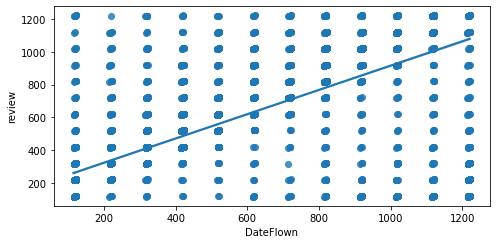

In [286]:
import seaborn as sns

# Assume that `df` is a dataframe containing the `DateFlown` and `ReviewDate` columns

# Use Seaborn's `regplot()` function to create a scatter plot with a linear regression line
sns.regplot(x='DateFlown', y='review', data=data)

# Show the plot
plt.show()


In [287]:
data.dtypes

AirName                 object
AircraftModel           object
Comments                object
DateFlown                int32
EntertainmentRating     object
FoodRating             float64
GroundServiceRating      int64
OverallScore           float64
Recommended             object
ReviewDate              object
ReviewTitle             object
ReviewrCountry          object
Route                   object
SeatComfortRating       object
SeatType                object
ServiceRating            int64
TravelType              object
ValueRating              int64
WifiRating             float64
Unnamed: 19            float64
Unnamed: 20            float64
review                   int32
dtype: object

The correlation coefficient is:  0.7360591890548775


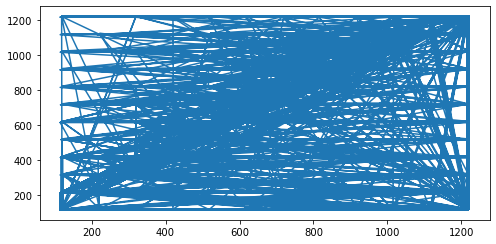

In [288]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

col1 = data['DateFlown']
col2 = data['review']

plt.plot(col1, col2)

print("The correlation coefficient is: ", col1.corr(col2))

plt.show()

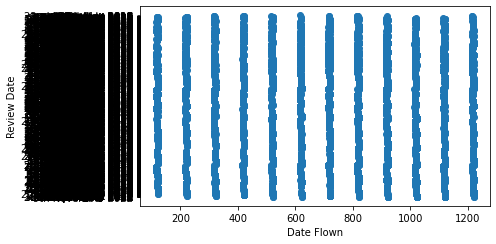

In [289]:
import matplotlib.pyplot as plt

# Assume that `df` is a dataframe containing the `DateFlown` and `ReviewDate` columns

# Extract the `DateFlown` and `ReviewDate` columns as separate arrays
date_flown = data['DateFlown'].values
review_date = data['ReviewDate'].values

# Create the scatter plot
plt.scatter(date_flown, review_date)

# Add axis labels
plt.xlabel('Date Flown')
plt.ylabel('Review Date')

# Show the plot
plt.show()

<AxesSubplot:>

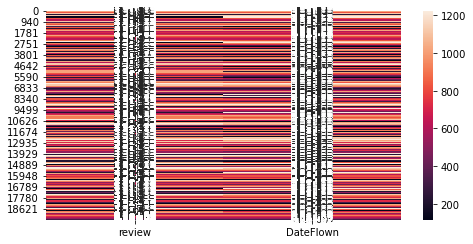

In [290]:
sns.heatmap(data[['review', 'DateFlown']], annot=True)

In [291]:
data.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20,review
0,airasia,A320,"| According their check in process, they men...",1022,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN,1122
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",1122,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN,1122
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",1122,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN,1122
3,airasia,NaN,"? , | My wife has problems with her knees and...",1022,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN,1122
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",1022,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN,1122


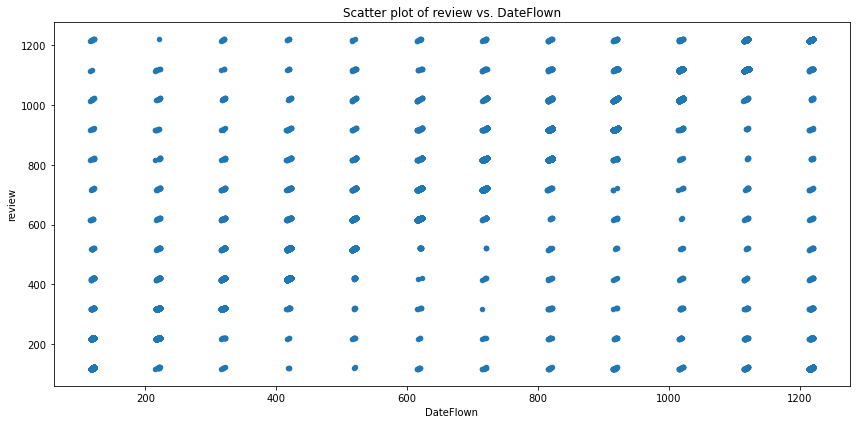

In [292]:
def plot_scatter(test, cols, col_y = 'review'):
    for col in cols:
        fig = plt.figure(figsize=(12,6)) # define plot area
        ax = fig.gca() # define axis   
        test.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

plot_scatter(data,["DateFlown"])   

In [293]:
data["DateFlown"]=data["DateFlown"].astype(str)
data["review"]=data["review"].astype(str)
def insert_str(string, str_to_insert, index):
    return string[:index] + str_to_insert + string[index:]

In [294]:
data.dtypes

AirName                 object
AircraftModel           object
Comments                object
DateFlown               object
EntertainmentRating     object
FoodRating             float64
GroundServiceRating      int64
OverallScore           float64
Recommended             object
ReviewDate              object
ReviewTitle             object
ReviewrCountry          object
Route                   object
SeatComfortRating       object
SeatType                object
ServiceRating            int64
TravelType              object
ValueRating              int64
WifiRating             float64
Unnamed: 19            float64
Unnamed: 20            float64
review                  object
dtype: object

In [295]:
data.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20,review
0,airasia,A320,"| According their check in process, they men...",1022,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN,1122
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",1122,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN,1122
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",1122,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN,1122
3,airasia,NaN,"? , | My wife has problems with her knees and...",1022,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN,1122
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",1022,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN,1122


In [296]:
for ind in data.index:
    try:
        if(int(data["DateFlown"][ind])<=922):
            data["DateFlown"][ind]=insert_str(data["DateFlown"][ind],'0',0)
#             print(test["review"][ind])
        if(int(data["review"][ind])<=922):
            data["review"][ind]=insert_str(data["review"][ind],'0',0)
#             print(test["review"][ind])
            
    except:
        print("Error:",data["DateFlown"][ind],data["review"][ind])
        continue

In [297]:
from datetime import datetime

def monthdif(a,b):
    
    # Parse the Dateflown and review columns to obtain datetime objects
    dateflown = datetime.strptime(str(a), '%m%y')
    review = datetime.strptime(str(b), '%m%y')

    # Subtract the two datetime objects to obtain a timedelta object
    timedelta = review - dateflown

    # Divide the timedelta object by the number of days in a month to obtain the number of months
    months = round(timedelta.days / 30)

    return months


In [298]:
monthdif("0519","0719")

2

In [299]:
data["difference"]=''

In [300]:
for ind in data.index:
    try:
        data["difference"][ind]=monthdif(data["DateFlown"][ind],data["review"][ind])
    except:
        print("Error")
        continue

In [303]:
data.tail()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20,review,difference
19529,united-airlines,Boeing 747,"| My whole experience this evening, from an ...",0322,1,1.0,1,1.0,NaN,7th March 2022,"""made me feel like we were cattle to United Ai...",(United States),Portland to Portland,1,Economy Class,2,Family Leisure,1,0.0,NaN,NaN,0322,0
19530,united-airlines,NaN,"? , | United is the most unorganized airline ...",0322,1,1.0,1,1.0,NaN,6th March 2022,"""they have no clue what theyre doing""",(United States),Houston to Dublin via Newark,1,Economy Class,1,Family Leisure,1,1.0,NaN,NaN,0322,0
19531,united-airlines,NaN,| We flew from FL to Houston on February 25t...,0222,0,5.0,5,10.0,yes,6th March 2022,"""Our flight attendant was a blessing and very ...",(United States),Florida to Houston,5,Economy Class,5,Family Leisure,5,0.0,NaN,NaN,0322,1
19532,united-airlines,NaN,"? , | Stuck in Denver for almost 24 hours bec...",0322,1,1.0,1,1.0,NaN,5th March 2022,"""I will never fly united again""",(United States),Houston to Williston via Denver,1,Economy Class,1,Business,1,0.0,NaN,NaN,0322,0
19533,united-airlines,NaN,"? , | We had a connecting flight through Newa...",0322,3,3.0,1,1.0,NaN,5th March 2022,"""had to lug our bags around the whole time""",(United States),Denver to Bridgetown via Newark,3,Economy Class,3,Family Leisure,1,4.0,NaN,NaN,0322,0


In [304]:
print(data["difference"].mean())

0.8228181191654659


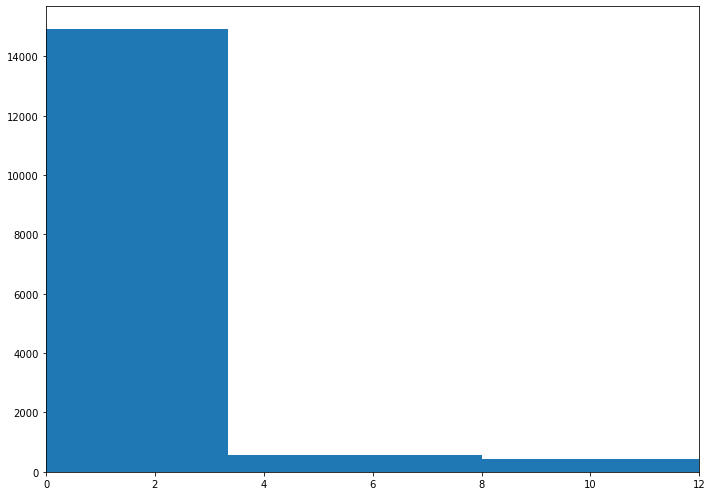

In [305]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data["difference"],bins=12)
 
# Show plot
plt.xlim(xmin=0, xmax = 12)
plt.show()


## Hence, We can use Review date as travel date as the average difference between travel date and Review date is less than 1 which is verified from existing values.

In [550]:
data=dataset

In [554]:
dataset.head(15)

,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,airasia,according their check in process they men...,Oct-22,according check process mentioned able start o...,1,1.0,1,1,0,1122,"""They should bring more food""",(Malaysia),1,Economy Class,3,2,1.0
1,airasia,nice uneventful short flight clean air...,Nov-22,nice uneventful short flight clean aircraft su...,0,0.0,5,9,1,1122,"""Nice, uneventful short flight""",(Malaysia),4,Economy Class,5,5,0.0
2,airasia,never again with airasia i wish i could...,Nov-22,never airasia wish could given star coming loy...,0,1.0,1,1,0,1122,"""Never again with AirAsia""",(Malaysia),1,Economy Class,1,2,0.0
3,airasia,my wife has problems with her knees and...,Oct-22,wife problem knee great difficulty stair notif...,0,0.0,1,2,1,1122,"""when it was time to board no wheelchair""",(Malaysia),1,Economy Class,1,1,0.0
4,airasia,my flight was suppose to be at pm ...,Oct-22,flight suppose pm flight got delayed pm waited...,0,0.0,1,1,0,1122,"""a very bad experience for me""",(Malaysia),1,Economy Class,1,1,0.0
5,airasia,first of all i understand that airasia ...,Oct-22,first understand airasia low fare airline mean...,1,5.0,2,5,1,1022,"""please respect your customers time""",(Malaysia),1,Economy Class,4,3,1.0
6,airasia,airasia has no proper customer support ...,Oct-22,airasia proper customer support able reach cus...,0,0.0,0,2,0,1022,"""not able to reach customer care""",(Malaysia),0,Economy Class,0,3,0.0
7,airasia,booking for onward flights were correct...,Sep-22,booking onward flight correct enough time conn...,0,1.0,1,2,0,1022,"""too short time to connect""",(Malaysia),2,Economy Class,1,2,0.0
8,airasia,absolutely the worst customer service can...,Oct-22,absolutely worst customer service ever talk re...,0,0.0,1,1,0,1022,"""I'll pay more elsewhere""",(Malaysia),1,Economy Class,1,1,0.0
9,airasia,the system auto assigned my yr old daugh...,Oct-22,system auto assigned yr old daughter seat row ...,0,0.0,1,1,0,1022,"""Go with another airline""",(Malaysia),3,Economy Class,3,3,0.0


In [555]:
dataset.isna().sum()

AirName                   0
Comments                  0
DateFlown              3421
Review                    0
EntertainmentRating       0
FoodRating                0
GroundServiceRating       0
OverallScore              0
Recommended               0
ReviewDate                0
ReviewTitle               0
ReviewrCountry            0
SeatComfortRating         0
SeatType                  0
ServiceRating             0
ValueRating               0
WifiRating                0
dtype: int64

In [556]:
dataset['DateFlown'] .fillna(dataset['ReviewDate'],inplace = True)

In [557]:
dataset.isna().sum()

AirName                0
Comments               0
DateFlown              0
Review                 0
EntertainmentRating    0
FoodRating             0
GroundServiceRating    0
OverallScore           0
Recommended            0
ReviewDate             0
ReviewTitle            0
ReviewrCountry         0
SeatComfortRating      0
SeatType               0
ServiceRating          0
ValueRating            0
WifiRating             0
dtype: int64

In [558]:
dataset["DateFlown"].value_counts()

Jul-22    623
Jun-22    578
Aug-22    533
May-22    509
Oct-22    505
         ... 
0622        1
0715        1
1216        1
0709        1
0809        1
Name: DateFlown, Length: 178, dtype: int64

In [559]:
import datetime

def dateconv(strr):
    
    # Parse the date string into a datetime object
    date_str = strr # 9th November 2022
    try:
        date = datetime.datetime.strptime(date_str, '%b-%y')
    except ValueError:
        try:
            date = datetime.datetime.strptime(date_str, "%b-%Y")
        except ValueError:
            try:
                date = datetime.datetime.strptime(date_str, "%b %Y")
            except ValueError:
                try:

                    date = datetime.datetime.strptime(date_str,  "%b %y") 
                except ValueError:
                    try:
                        date = datetime.datetime.strptime(date_str,  "%b%y") 
                    except:
                        try:
                            date = datetime.datetime.strptime(date_str,  "%B %y") 
                        except:
                            try:
                                date = datetime.datetime.strptime(date_str,  "%B %Y") 
                            except:
                                try:
                                    date = datetime.datetime.strptime(date_str,  "%-m %y") 
                                except:
                                    try:
                                        date = datetime.datetime.strptime(date_str,  "%m %y") 
                                    except:                                   
                                            try:
                                                if int(date_str):
                                                    return date_str
                                            except:
                                                print(date_str)
                                                print("Something went wrong!")

    finally:
        month=date.month
        year = date.year

        # Convert the day, month, and year to strings, and pad with zeros as necessary
#         day_str = str(day).zfill(2)
        month_str = str(month).zfill(2)
        year_str = str(year)[2:]

        # Concatenate the day, month, and year strings to create the final integer
        int_date =  month_str + year_str
#         print("Sucess:",int_date)  # Output: "091122"
    return int_date


In [560]:
dateconv("Jul-22")

'0722'

In [576]:
for ind in dataset.index:
    try:
         dataset["DateFlown"][ind]=dateconv(dataset["DateFlown"][ind])
    except:
        continue

In [562]:
dataset["DateFlown"].value_counts()

0722    623
0622    579
0822    533
0522    509
1022    505
       ... 
0909      3
0609      2
1009      2
0709      1
0809      1
Name: DateFlown, Length: 162, dtype: int64

In [568]:
dataset.to_csv('ProcessedData.csv')

In [569]:
dataset['ReviewrCountry'] =  dataset['ReviewrCountry'].apply(lambda x: x.replace('(','').replace(')','')) 

In [570]:
dataset.head(15)

,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,airasia,according their check in process they men...,1022,according check process mentioned able start o...,1,1.0,1,1,0,1122,bring food,Malaysia,1,Economy Class,3,2,1.0
1,airasia,nice uneventful short flight clean air...,1122,nice uneventful short flight clean aircraft su...,0,0.0,5,9,1,1122,nice uneventful short flight,Malaysia,4,Economy Class,5,5,0.0
2,airasia,never again with airasia i wish i could...,1122,never airasia wish could given star coming loy...,0,1.0,1,1,0,1122,never airasia,Malaysia,1,Economy Class,1,2,0.0
3,airasia,my wife has problems with her knees and...,1022,wife problem knee great difficulty stair notif...,0,0.0,1,2,1,1122,time board wheelchair,Malaysia,1,Economy Class,1,1,0.0
4,airasia,my flight was suppose to be at pm ...,1022,flight suppose pm flight got delayed pm waited...,0,0.0,1,1,0,1122,bad experience,Malaysia,1,Economy Class,1,1,0.0
5,airasia,first of all i understand that airasia ...,1022,first understand airasia low fare airline mean...,1,5.0,2,5,1,1022,please respect customer time,Malaysia,1,Economy Class,4,3,1.0
6,airasia,airasia has no proper customer support ...,1022,airasia proper customer support able reach cus...,0,0.0,0,2,0,1022,able reach customer care,Malaysia,0,Economy Class,0,3,0.0
7,airasia,booking for onward flights were correct...,0922,booking onward flight correct enough time conn...,0,1.0,1,2,0,1022,short time connect,Malaysia,2,Economy Class,1,2,0.0
8,airasia,absolutely the worst customer service can...,1022,absolutely worst customer service ever talk re...,0,0.0,1,1,0,1022,pay elsewhere,Malaysia,1,Economy Class,1,1,0.0
9,airasia,the system auto assigned my yr old daugh...,1022,system auto assigned yr old daughter seat row ...,0,0.0,1,1,0,1022,go another airline,Malaysia,3,Economy Class,3,3,0.0


In [571]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical column.
dataset['AirName']= label_encoder.fit_transform(dataset['AirName'])
dataset['ReviewrCountry']= label_encoder.fit_transform(dataset['ReviewrCountry'])
dataset['SeatType']= label_encoder.fit_transform(dataset['SeatType'])

In [573]:
dataset["FoodRating"]=dataset["FoodRating"].astype(int)
dataset["WifiRating"]=dataset["WifiRating"].astype(int)


In [577]:
dataset.head(15)

,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,6,according their check in process they men...,1022,according check process mentioned able start o...,1,1,1,1,0,1122,bring food,47,1,1,3,2,1
1,6,nice uneventful short flight clean air...,1122,nice uneventful short flight clean aircraft su...,0,0,5,9,1,1122,nice uneventful short flight,47,4,1,5,5,0
2,6,never again with airasia i wish i could...,1122,never airasia wish could given star coming loy...,0,1,1,1,0,1122,never airasia,47,1,1,1,2,0
3,6,my wife has problems with her knees and...,1022,wife problem knee great difficulty stair notif...,0,0,1,2,1,1122,time board wheelchair,47,1,1,1,1,0
4,6,my flight was suppose to be at pm ...,1022,flight suppose pm flight got delayed pm waited...,0,0,1,1,0,1122,bad experience,47,1,1,1,1,0
5,6,first of all i understand that airasia ...,1022,first understand airasia low fare airline mean...,1,5,2,5,1,1022,please respect customer time,47,1,1,4,3,1
6,6,airasia has no proper customer support ...,1022,airasia proper customer support able reach cus...,0,0,0,2,0,1022,able reach customer care,47,0,1,0,3,0
7,6,booking for onward flights were correct...,0922,booking onward flight correct enough time conn...,0,1,1,2,0,1022,short time connect,47,2,1,1,2,0
8,6,absolutely the worst customer service can...,1022,absolutely worst customer service ever talk re...,0,0,1,1,0,1022,pay elsewhere,47,1,1,1,1,0
9,6,the system auto assigned my yr old daugh...,1022,system auto assigned yr old daughter seat row ...,0,0,1,1,0,1022,go another airline,47,3,1,3,3,0


In [575]:
dataset.to_csv('dataset.csv')

In [2]:
ds = pd.read_csv("ProcessedData.csv")

In [3]:
ds.head()

,Unnamed: 0,AirName,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,0,airasia,according their check in process they men...,1022,according check process mentioned able start o...,1,1.0,1,1,0,1122,bring food,(Malaysia),1,Economy Class,3,2,1.0
1,1,airasia,nice uneventful short flight clean air...,1122,nice uneventful short flight clean aircraft su...,0,0.0,5,9,1,1122,nice uneventful short flight,(Malaysia),4,Economy Class,5,5,0.0
2,2,airasia,never again with airasia i wish i could...,1122,never airasia wish could given star coming loy...,0,1.0,1,1,0,1122,never airasia,(Malaysia),1,Economy Class,1,2,0.0
3,3,airasia,my wife has problems with her knees and...,1022,wife problem knee great difficulty stair notif...,0,0.0,1,2,1,1122,time board wheelchair,(Malaysia),1,Economy Class,1,1,0.0
4,4,airasia,my flight was suppose to be at pm ...,1022,flight suppose pm flight got delayed pm waited...,0,0.0,1,1,0,1122,bad experience,(Malaysia),1,Economy Class,1,1,0.0


In [5]:
ds.describe

<bound method NDFrame.describe of        Unnamed: 0          AirName  \
0               0          airasia   
1               1          airasia   
2               2          airasia   
3               3          airasia   
4               4          airasia   
...           ...              ...   
18816       19529  united-airlines   
18817       19530  united-airlines   
18818       19531  united-airlines   
18819       19532  united-airlines   
18820       19533  united-airlines   

                                                Comments  DateFlown  \
0          according their check in process  they men...       1022   
1            nice  uneventful short flight  clean air...       1122   
2            never again with airasia  i wish i could...       1122   
3             my wife has problems with her knees and...       1022   
4             my flight was suppose to be at      pm ...       1022   
...                                                  ...        ...   
18816      m

In [6]:
ds = ds.drop('Unnamed: 0', axis=1)

In [7]:
ds["FoodRating"]=ds["FoodRating"].astype(int)
ds["WifiRating"]=ds["WifiRating"].astype(int)

In [8]:
ds['ReviewrCountry'] =  ds['ReviewrCountry'].apply(lambda x: x.replace('(','').replace(')','')) 

In [9]:
import pandas as pd

# Assuming your dataframe is named 'df'
# Calculate the number of reviews for each airline
review_counts = ds['AirName'].value_counts()

# Filter the dataframe to include only airlines with at least 100 reviews
airlines_with_100_reviews = review_counts[review_counts >= 100].index
filtered_df = ds[ds['AirName'].isin(airlines_with_100_reviews)]

# Print the filtered dataframe
print(filtered_df)


               AirName                                           Comments  \
0              airasia      according their check in process  they men...   
1              airasia        nice  uneventful short flight  clean air...   
2              airasia        never again with airasia  i wish i could...   
3              airasia         my wife has problems with her knees and...   
4              airasia         my flight was suppose to be at      pm ...   
...                ...                                                ...   
18816  united-airlines      my whole experience this evening  from an ...   
18817  united-airlines         united is the most unorganized airline ...   
18818  united-airlines      we flew from fl to houston on february   t...   
18819  united-airlines         stuck in denver for almost    hours bec...   
18820  united-airlines         we had a connecting flight through newa...   

       DateFlown                                             Review  \
0   

In [10]:
filtered_df.groupby('AirName').count()

,Comments,DateFlown,Review,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
AirName,,,,,,,,,,,,,,,,
Air India,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
Ana,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
air-europa,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
air-france,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
air-new-zealand,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
airasia,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239
american-airlines,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
austrian-airlines,390,390,390,390,390,390,390,390,390,389,390,390,390,390,390,390
bangkok-airways,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390


In [12]:
filtered_df.to_csv('ProcessedData.csv')